In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

from surprise import KNNWithMeans, Dataset, accuracy, Reader
from surprise.model_selection import train_test_split

In [2]:
df_movies = pd.read_csv("Data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_ratings = pd.read_csv("Data/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df_ratings.drop(columns='timestamp', inplace=True)

In [5]:
df_cleaned = df_movies.merge(df_ratings, on='movieId')

In [6]:
df_cleaned.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [7]:
df_clean = df_cleaned[['userId','title','rating']]

In [8]:
df_clean.head()

,userId,title,rating
0,1,Toy Story (1995),4.0
1,5,Toy Story (1995),4.0
2,7,Toy Story (1995),4.5
3,15,Toy Story (1995),2.5
4,17,Toy Story (1995),4.5


In [9]:
num_users = len(df_clean['userId'].value_counts())
num_items = len(df_clean['title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))


Unique number of users in the dataset: 610
Unique number of movies in the dataset: 9719


In [10]:
rating_count_df = pd.DataFrame(df_clean.groupby(['rating']).size(), columns=['Num Ratings'])
rating_count_df

,Num Ratings
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [11]:
#########################

PLOTS BELOW

Text(0, 0.5, 'Number of Ratings')

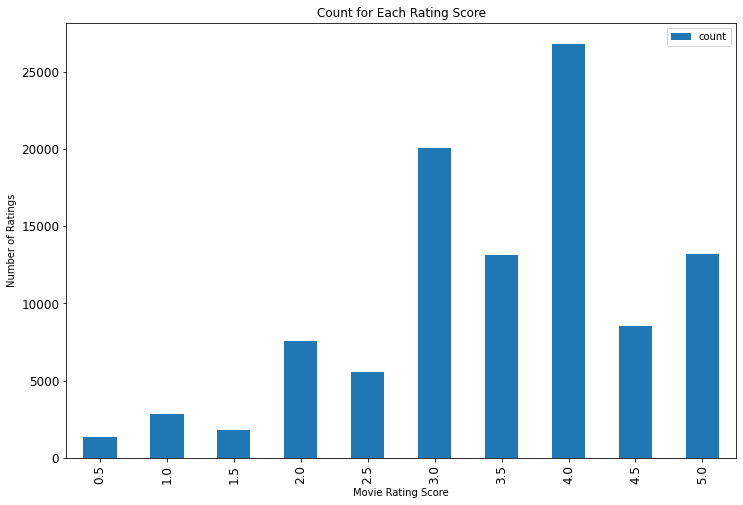

In [21]:
rtg_countdf = pd.DataFrame(df_clean.groupby(['rating']).size(), columns=['count'])

ax = rtg_countdf.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("Movie Rating Score")
ax.set_ylabel("Number of Ratings")

PLOTS ABOVE

In [12]:
import surprise
from surprise import Dataset, Reader, SVD
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
# Load the dataset using Surprise
reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(df_clean[['userId', 'title', 'rating']], reader)

In [14]:
train, test = train_test_split(data, test_size=0.2, random_state=42)


In [15]:
from surprise import SVD

algo = SVD()
trainset = data.build_full_trainset()
algo.fit(trainset)

In [16]:
#algo.test(test)

In [17]:
surprise.accuracy.mae(algo.test(test))

MAE:  0.4944


0.4944383698965026

In [18]:
surprise.accuracy.rmse(algo.test(test))

RMSE: 0.6372


0.6371988613787297

In [19]:
from surprise.prediction_algorithms.matrix_factorization import SVD
SVD = SVD()

In [20]:
from surprise.model_selection import RandomizedSearchCV

# Define the search space for hyperparameters
param_distributions = {'n_factors': [50, 100, 200],
                       'n_epochs': [10, 20, 30],
                       'lr_all': [0.002, 0.005, 0.01],
                       'reg_all': [0.02, 0.1, 0.4]}
# Create the randomized search object
rs = RandomizedSearchCV(SVD, param_distributions, n_iter=10, measures=['rmse', 'mae'], cv=5)

# Run the randomized search
rs.fit(data)

# Get the best RMSE score and the corresponding hyperparameters
best_rmse = rs.best_score['rmse']
best_params = rs.best_params['rmse']


TypeError: 'SVD' object is not callable

In [ ]:
print('Best RMSE: ' + str(best_rmse))

In [ ]:
print('Best Params: ' + str(best_params))